In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [5]:
def draw_polygon_tri(polygon,tri):
    plt.close()
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

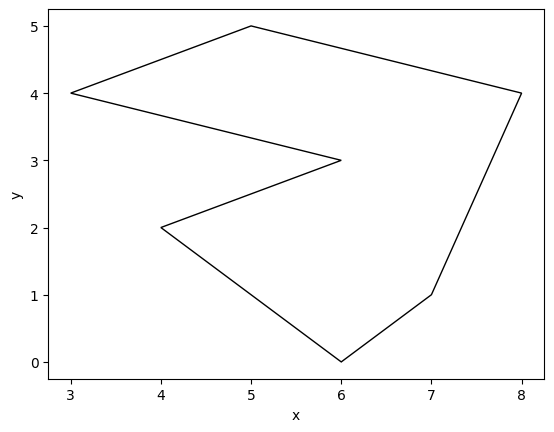

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [7]:
polygon = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (10,4)]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [8]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    n = len(polygon)
    idx = 0
    for i in range(1,n):
        if polygon[idx][1] < polygon[i][1]:
            idx = i
    left = True
    for i in range(n+1):
        if left and polygon[(idx + i) % n][1] < polygon[(idx + i + 1) % n][1]:
            left = False
        elif not left and polygon[(idx + i) % n][1] > polygon[(idx + i + 1) % n][1]:
            return i == n

    return False

Przeprowadź test poprawności powyższej funkcji.

In [9]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.026s


Sprawdź monotoniczność swojego wielokątu.

In [10]:
print(is_y_monotonic(polygon_example_1))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

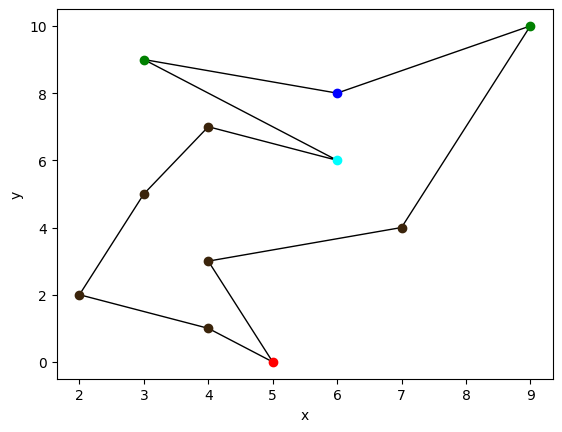

In [11]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [12]:
def det(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (b[0] - c[0]) * (a[1] - c[1]) 

In [13]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    y = 1
    n = len(polygon)
    T= [0] * n
    for i in range(n):
        prev = polygon[i-1]
        next = polygon[(i+1)%n]
        if polygon[i][y] > next[y] and polygon[i][y] > prev[y] and det(prev, polygon[i], next)>0:
            T[i] = 0
        elif polygon[i][y] < next[y] and polygon[i][y] < prev[y] and det(prev, polygon[i], next)>0:
            T[i] = 1
        elif polygon[i][y] < next[y] and polygon[i][y]< prev[y] and det(prev, polygon[i], next)<0:
            T[i] = 2
        elif polygon[i][y] > next[y] and polygon[i][y] > prev[y] and det(prev, polygon[i], next)<0:
            T[i] = 3
        else:
            T[i] = 4
    return T

Przeprowadź test poprawności powyższej funkcji. 

In [14]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.023s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

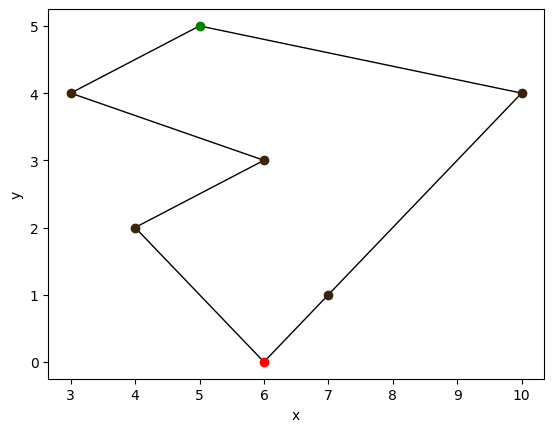

In [15]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

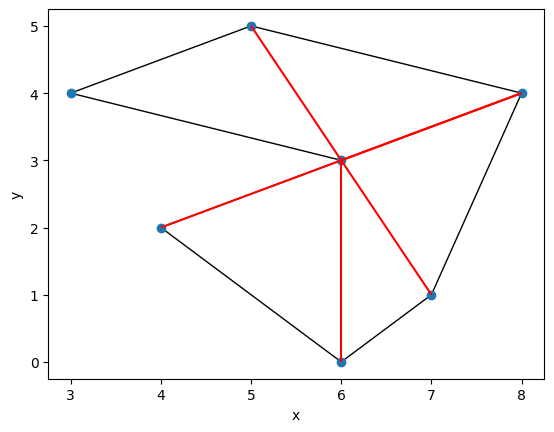

In [16]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [17]:
def chains(polygon):
    """ the lowest point is not in left or right chain """
    n = len(polygon)
    idx = 0
    for i in range(1,n):
        if polygon[idx][1] < polygon[i][1]:
            idx = i
    L = set()
    R = set()
    left = True
    for i in range(n):
        if left and polygon[(idx + i) % n][1] < polygon[(idx + i + 1) % n][1]:
            left = False
        elif left:
            L.add(polygon[(idx + i) % n])
        else:
            R.add(polygon[(idx + i) % n])
    return L, R

def different_chains(p, S, L, R):
    return (p not in L and S[-1] in L) or (p not in R and S[-1] in R)

def save_indices(polygon):
    return {p: i for i, p in enumerate(polygon)}

def det(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (b[0] - c[0]) * (a[1] - c[1]) 

def is_triangle_inside(p1, p2, p3, L, R):
    if p3 in L:
        return det(p1, p2, p3) > 0
    else:
        return det(p1, p2, p3) < 0

def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    n = len(polygon)
    L, R = chains(polygon)
    idx = save_indices(polygon)
    polygon = sorted(polygon, key=lambda p: p[1], reverse=True)

    P = []
    S = [polygon[0], polygon[1]]
    for i in range(2, n):
        if different_chains(polygon[i], S, L, R):
            for p in S[1:]:
                P.append([idx[p], idx[polygon[i]]])
            S = [S[-1], polygon[i]]
        else:
            while len(S) >= 2:
                if is_triangle_inside(S[-2], S[-1], polygon[i], L, R):
                    P.append([idx[S[-2]], idx[polygon[i]]])
                    S.pop()
                else:
                    break
            S.append(polygon[i])
    return P[:-1]

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [18]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.019s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.widgets as mwdg

from matplotlib.backend_bases import MouseEvent
from matplotlib.patches import Polygon

BLUE = u'#1f77b4'


class Callback:
    def __init__(self, ax):
        self.added_points = []
        self.ax = ax

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        new_point = (event.xdata, event.ydata)
        self.added_points.append(new_point)
        print(new_point)
        self.draw(autoscaling=False)

    def draw_points(self):
        if self.added_points:
            self.ax.scatter(*zip(*(np.array(self.added_points))))

    def draw_lines(self):
        if len(self.added_points) >= 2:
            # lines = []
            for i in range(len(self.added_points)):
                self.ax.plot([self.added_points[i-1][0], self.added_points[i][0]],
                             [self.added_points[i-1][1], self.added_points[i][1]], color=BLUE)
    
    def draw_polygon(self):
        if len(self.added_points) >= 3:
            p = Polygon(self.added_points, alpha=0.3)
            self.ax.add_patch(p)
    
    def draw(self, autoscaling=True):
        if not autoscaling:
            xlim = self.ax.get_xlim()
            ylim = self.ax.get_ylim()
        self.ax.clear()
        self.draw_points()
        self.draw_lines()
        self.draw_polygon()
        self.ax.autoscale(autoscaling)
        if not autoscaling:
            self.ax.set_xlim(xlim)
            self.ax.set_ylim(ylim)
        plt.draw()


class InputVisualizer(Visualizer):
    def __init__(self):
        super().__init__()
        self.callback = None
        plt.close()
        self.fig = plt.figure()
        self.ax = plt.axes(autoscale_on=False)
        
    def get_added_points(self):
        plt.close()
        return self.callback.added_points

    def input(self):
        self.callback = Callback(self.ax)
        self.fig.canvas.mpl_connect('button_press_event', self.callback.on_click)
        self.callback.draw()
        plt.show()

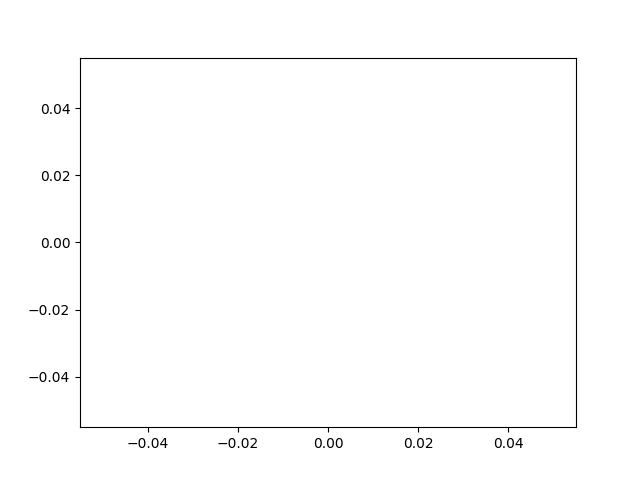

In [23]:
%matplotlib widget

vis = InputVisualizer()
vis.input()

In [24]:
polygon = vis.get_added_points()

Polygon_1

In [25]:
polygon_1 = [(-0.007046995470600739, 0.050245869582865726), (-0.03454699547060075, 0.035283748164321505), (-0.022571189018987844, 0.020998033878607214), (-0.03521231805124591, -0.0001329185023451751), (-0.02523247934156849, -0.005787680407107074), (-0.018801027728665258, -0.023644823264249937), (-0.03499054385769752, -0.03644244231186898), (-0.008599414825439453, -0.0403114899309166), (0.011360262593915385, -0.02810910897853565), (-0.010595382567374939, -0.012930537549964219), (0.010251391626173459, 0.007605176735750077), (0.02444494001327023, 0.0302242243547977), (-0.0034986083738265533, 0.033200414830988165)]

In [26]:
print(is_y_monotonic(polygon_1))

True


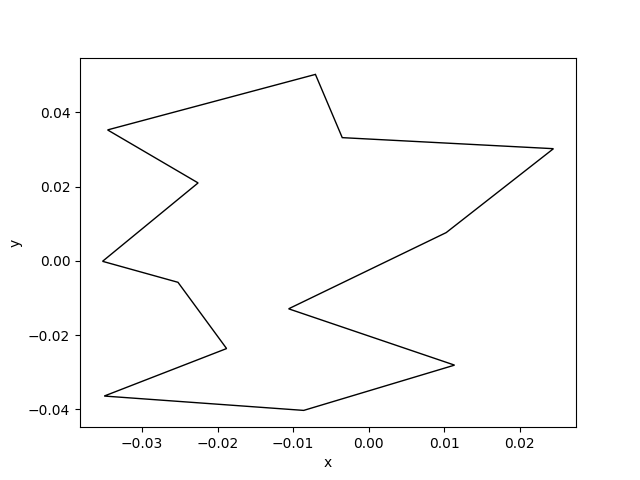

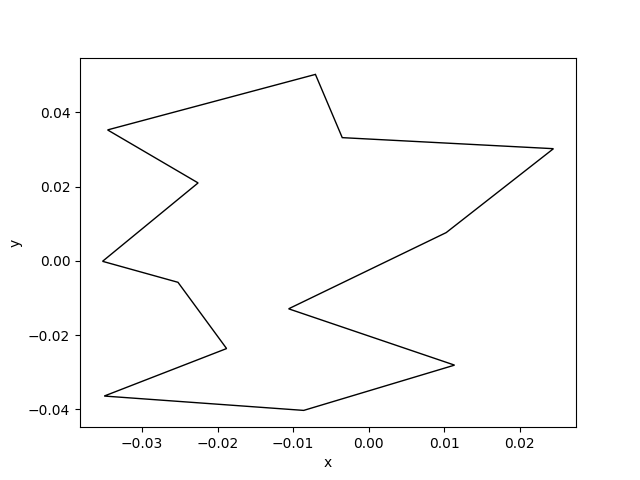

In [27]:
draw_polygon(polygon_1)

Podział wierzchołków

In [34]:
p1 = [(-0.0074905438576975125, 0.04708028619939637), (-0.03210747934156849, 0.03111708149765484), (-0.017692156760923325, 0.019807557688131028), (-0.013034898696407199, 0.005819462450035784), (-0.01968812450285881, -0.0010257756452023148), (-0.03698651159963301, 0.007307557688131017), (-0.0474098986964072, -0.00697815659758326), (-0.04363973740608462, -0.01799006135948803), (-0.022349414825439458, -0.018287680407107078), (-0.008599414825439453, -0.035251966121392794), (-0.024345382567374937, -0.04299006135948803), (0.02954574646488313, -0.049537680407107085), (0.037751391626173456, -0.02275196612139279), (0.014686875497141191, -0.00995434707377374), (0.03131994001327024, 0.014450414830988162), (0.006924778722947653, 0.024867081497654833), (0.012469133561657325, 0.04183136721194056)]

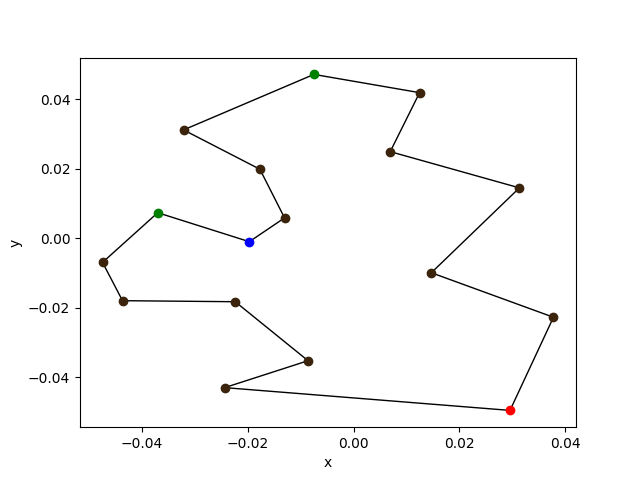

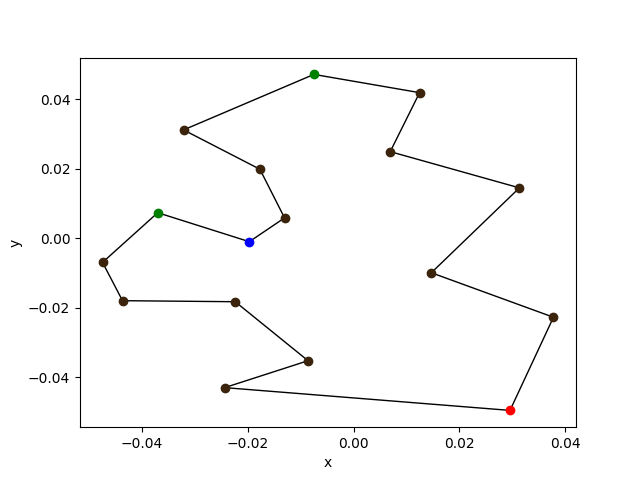

In [35]:
colors = color_vertex(p1)
draw_polygon_colors(p1,colors)

polygon1

In [36]:
t1 = [(-0.00305505998672978, 0.04726967910667525), (-0.028780866438342684, 0.038259938640511984), (-0.02589780192221365, 0.02635517673575008), (-0.012591350309310419, 0.014748033878607208), (-0.03343812450285881, -0.01720542808631792), (-0.01857925353511687, -0.03089590427679411), (4.9778722947646514e-05, -0.037145904276794116), (0.014021552916496038, -0.021967332848222686), (0.002045746464883133, -0.010360189991079821), (0.016682843239076678, 0.00035409572320589666), (0.003819940013270226, 0.009877905247015414), (0.0018239722713347395, 0.02386600048511066), (0.022227198077786364, 0.03696123858034875)]

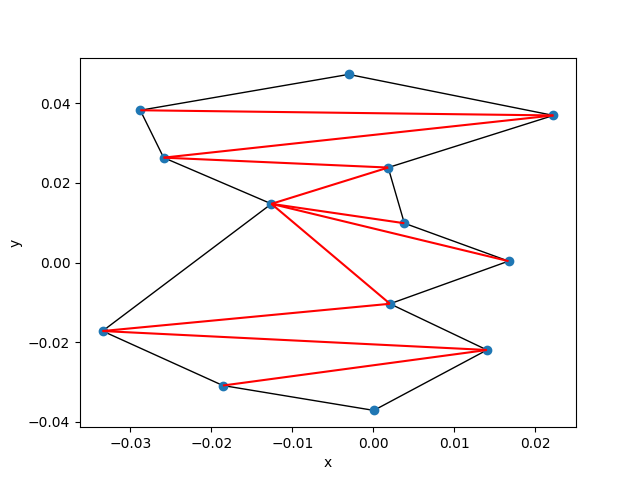

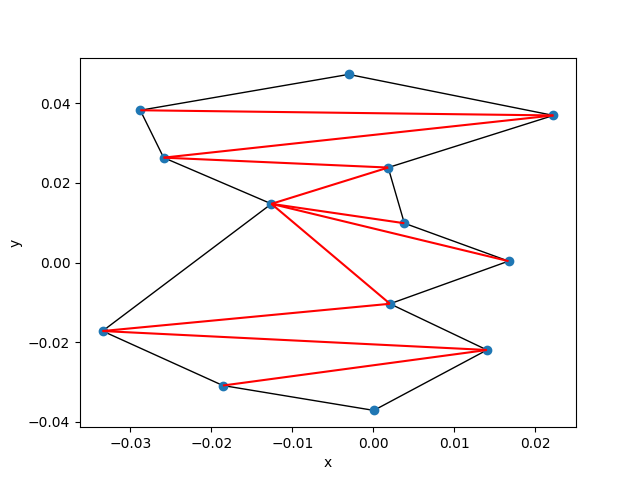

In [37]:
assert is_y_monotonic(t1), 'Polygon is not y-monotonic'
tri = triangulation(t1)
draw_polygon_tri(t1,[[t1[diag[0]], t1[diag[1]]] for diag in tri])

polygon2

In [167]:
t2 = [(-0.021905866438342685, 0.047891974304661675), (-0.044083285793181395, 0.022296736209423573), (-0.048962318051245915, 0.001165783828471198), (-0.03232925353511688, -0.0012151685524811884), (-0.04630102772866526, -0.03931040664771929), (-0.005272801922213646, -0.047643739981052625), (0.046178810981012175, 0.015451498114185475), (0.003376391626173453, 0.0255705457332331), (0.0035981658197218325, 0.04372530763799501)]

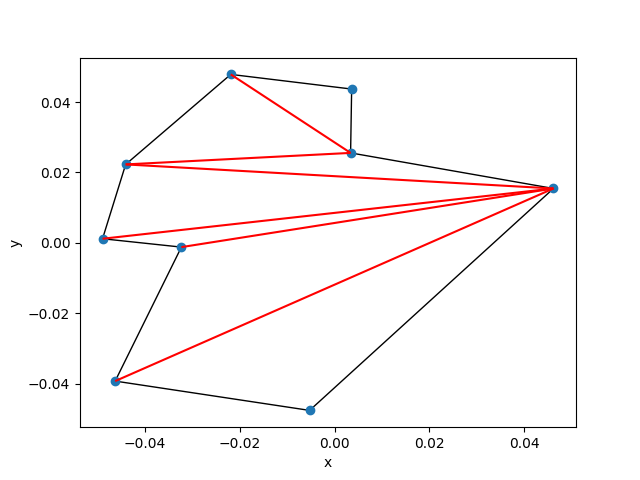

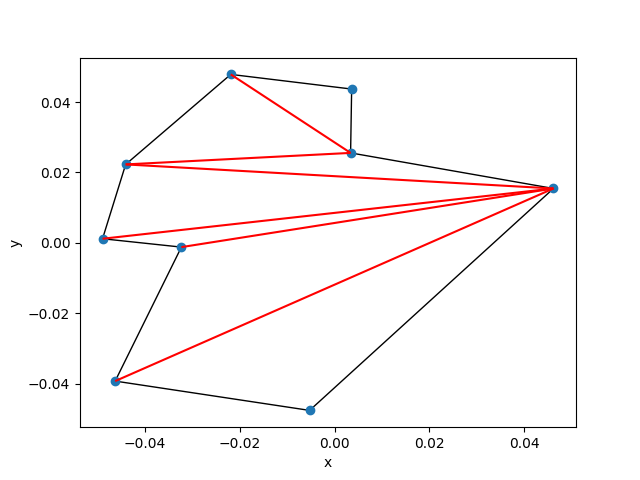

In [168]:
assert is_y_monotonic(t2), 'Polygon is not y-monotonic'
tri = triangulation(t2)
draw_polygon_tri(t2,[[t2[diag[0]], t2[diag[1]]] for diag in tri])

polygon3

In [169]:
t3 = [(0.018013488400366998, 0.05054348863048477), (-0.02833731805124591, 0.04391470054527388), (-0.04208731805124591, 0.017128986259559595), (-0.04829699547060075, -0.0025138708832975476), (-0.04009135030931043, -0.02662101374044041), (-0.01968812450285881, -0.04864482326424994), (0.025997359368108944, -0.04209720421663089), (0.03331590775520571, -0.023049585169011837), (0.04950542388423798, -0.0019186327880594545), (0.04706590775520572, 0.032307557688131025), (0.03619897227133474, 0.04808136721194055)]

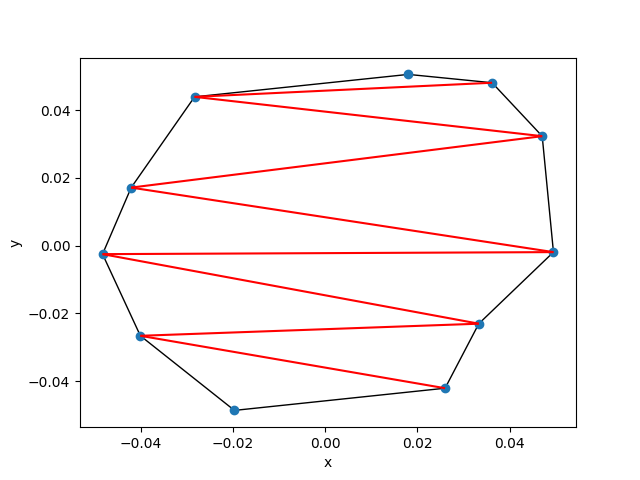

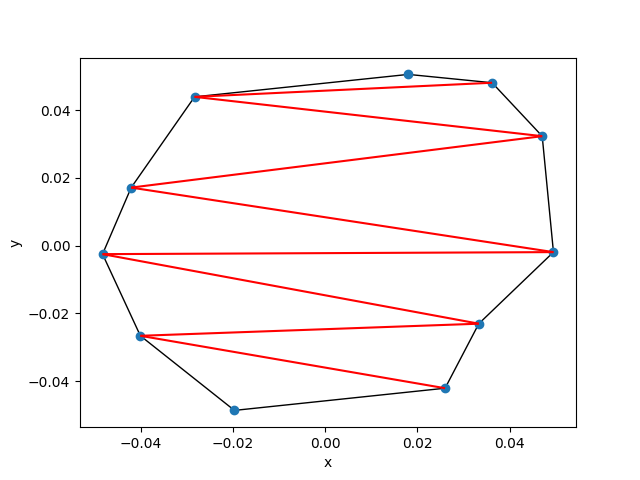

In [170]:
assert is_y_monotonic(t3), 'Polygon is not y-monotonic'
tri = triangulation(t3)
draw_polygon_tri(t3,[[t3[diag[0]], t3[diag[1]]] for diag in tri])

In [171]:
t5 = [(-0.009708285793181393, 0.049673460634239885), (-0.03432522127705236, -0.02722047979181457), (0.010916714206818612, -0.01501809883943362), (-0.004829253535116873, -0.0025180988394336162), (0.012690907755205705, 0.006708091636756855), (-0.0021679632125362197, 0.019208091636756866), (0.012690907755205705, 0.033196186874852096), (-0.00017199547060074705, 0.03676761544628067), (0.0029328432390766795, 0.044803329731994954)]

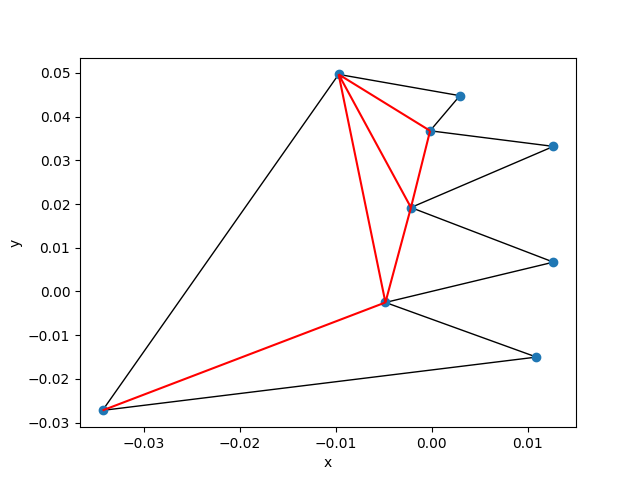

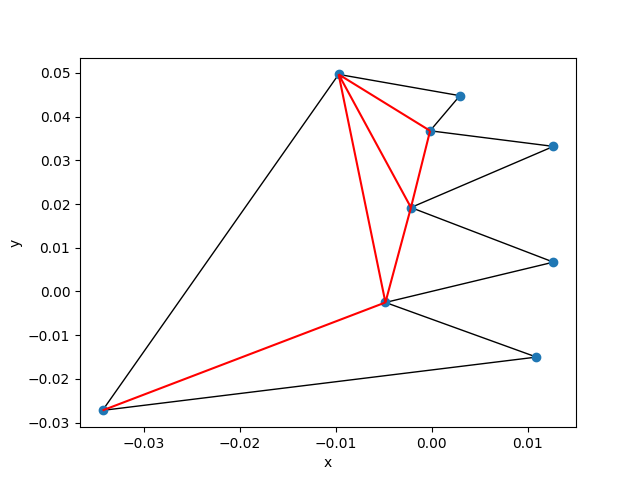

In [172]:
assert is_y_monotonic(t5), 'Polygon is not y-monotonic'
tri = triangulation(t5)
draw_polygon_tri(t5,[[t5[diag[0]], t5[diag[1]]] for diag in tri])

In [162]:
t6 = [(-0.019909898696407198, 0.047644240371076646), (-0.011260705148020099, 0.02145376418060045), (-0.014365543857697519, 0.0074656689425052075), (-0.03388167288995559, -0.015153378676542414), (0.031098165819721843, -0.008903378676542409)]

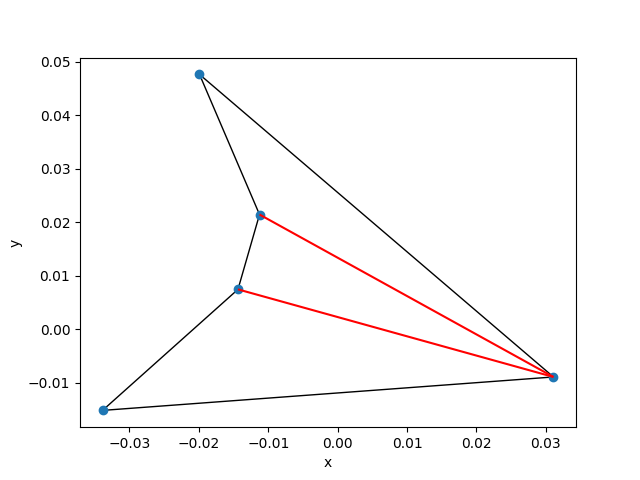

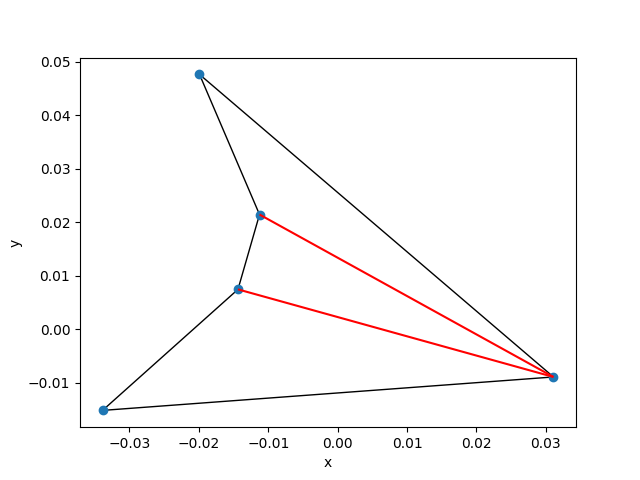

In [163]:
assert is_y_monotonic(t6), 'Polygon is not y-monotonic'
tri = triangulation(t6)
draw_polygon_tri(t6,[[t6[diag[0]], t6[diag[1]]] for diag in tri])